In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<AxesSubplot:>

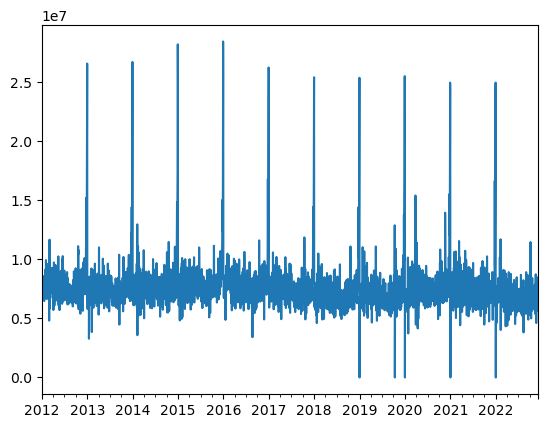

In [10]:
seijyo = pd.read_csv("../public/seijyo_ishi_seijyo_sales.csv")

y = pd.Series(seijyo.sales.values, index=pd.date_range('2012-1-1', periods=len(seijyo), freq='d'))
y.plot()

In [14]:
# 前半の3000時点のデータに対してADF検定をして、定常過程であるかどうか確認する。

from statsmodels.tsa import stattools

# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:3000], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:3000], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:3000], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:3000], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-8.80310633281242, 3.611125224180803e-12, 29, 2970, {'1%': -4.375035824289329, '5%': -3.834379871648728, '10%': -3.5544927910304316}, 92719.11259612776)
ct:
(-8.652751447632133, 2.2389890117123655e-12, 29, 2970, {'1%': -3.9618214097393727, '5%': -3.4119692752754753, '10%': -3.127921018210767}, 92719.7309688772)
c:
(-8.349132173112775, 3.028042460103423e-13, 29, 2970, {'1%': -3.4325536905242227, '5%': -2.862513646507894, '10%': -2.567288298246211}, 92722.8474648018)
nc:
(-0.8996818672750477, 0.32897446045555057, 27, 2972, {'1%': -2.5664926986508445, '5%': -1.9410907566282931, '10%': -1.6167309388688413}, 92786.9609519798)


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [13]:
# p値(タプル値の2番目の要素)が4パターン全てで5%を超えているため、帰無仮説を棄却できず、データに定常性はない。

<AxesSubplot:>

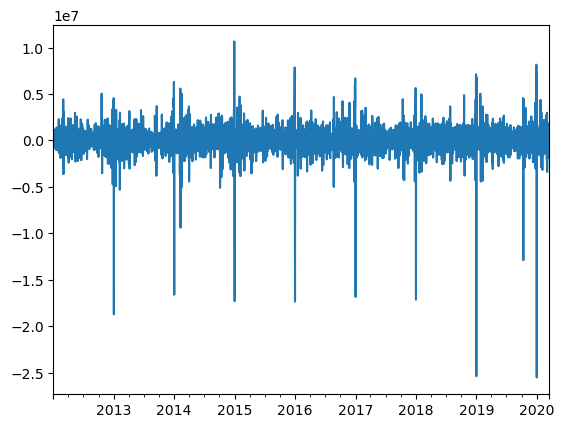

In [15]:
# 1次階差をとって、定常過程に変換する

y_diff = y.diff()[:3000].dropna()
y_diff.plot()

In [16]:
ctt = stattools.adfuller(y_diff, regression="ctt")
ct = stattools.adfuller(y_diff, regression="ct")
c = stattools.adfuller(y_diff, regression="c")
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-17.328842806963543, 0.0, 26, 2972, {'1%': -4.375033193126657, '5%': -3.8343785316112635, '10%': -3.5544919610199837}, 92761.54015192713)
ct:
(-17.331715991979888, 0.0, 26, 2972, {'1%': -3.961819354126585, '5%': -3.4119682791096397, '10%': -3.127920431760845}, 92759.54717753267)
c:
(-17.334689713359733, 5.384083573964826e-30, 26, 2972, {'1%': -3.4325522062723506, '5%': -2.862512990970051, '10%': -2.5672879492445415}, 92757.54730094322)
nc:
(-17.337640306550753, 1.0021921217788885e-28, 26, 2972, {'1%': -2.5664926986508445, '5%': -1.9410907566282931, '10%': -1.6167309388688413}, 92755.54761860437)


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [ ]:
# 1次階差でも、p値が4パターン全てで5%を超えているため、データに定常性はない。

<AxesSubplot:>

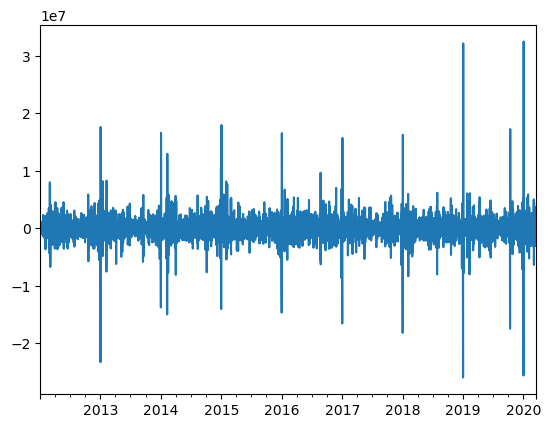

In [17]:
y_diff2 = y_diff.diff().dropna()
y_diff2.plot()

In [18]:
# 2次階差をとって、定常過程に変換する

ctt = stattools.adfuller(y_diff2, regression="ctt")
ct = stattools.adfuller(y_diff2, regression="ct")
c = stattools.adfuller(y_diff2, regression="c")
nc = stattools.adfuller(y_diff2, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-20.979592015056173, 0.0, 29, 2968, {'1%': -4.375038459001761, '5%': -3.83438121349347, '10%': -3.554493622160044}, 92951.55936687624)
ct:
(-20.98315538725319, 0.0, 29, 2968, {'1%': -3.9618234681254667, '5%': -3.411970272784787, '10%': -3.127921605451459}, 92949.55991537309)
c:
(-20.986722082311843, 0.0, 29, 2968, {'1%': -3.4325551767781697, '5%': -2.862514302929651, '10%': -2.5672886477185215}, 92947.56018070478)
nc:
(-20.990292420869896, 0.0, 29, 2968, {'1%': -2.566493713623666, '5%': -1.9410908794527204, '10%': -1.6167308192524141}, 92945.56029419877)


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [19]:
# 2次階差でも、p値が4パターン全てで0となり、帰無仮説を棄却でき、定常過程となる。

In [20]:
# SARIMAXを適用する

In [40]:
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from matplotlib import pyplot as plt

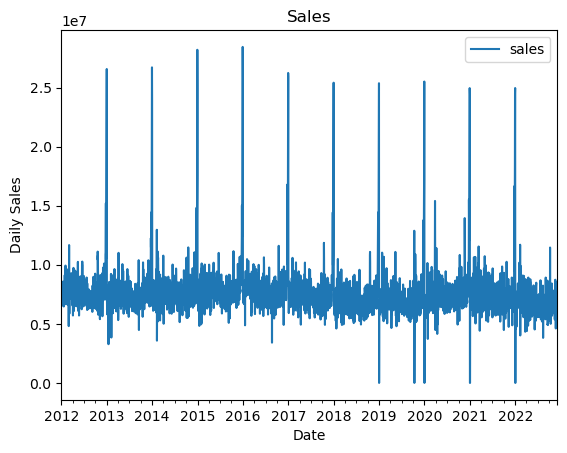

In [52]:
df = pd.read_csv("../public/seijyo_ishi_seijyo_sales.csv", index_col='date', parse_dates=True)
df.plot()
plt.title('Sales')
plt.ylabel('Daily Sales')
plt.xlabel('Date')
plt.show()

In [68]:
df_train = df[:3000]
df_test = df[3000:]

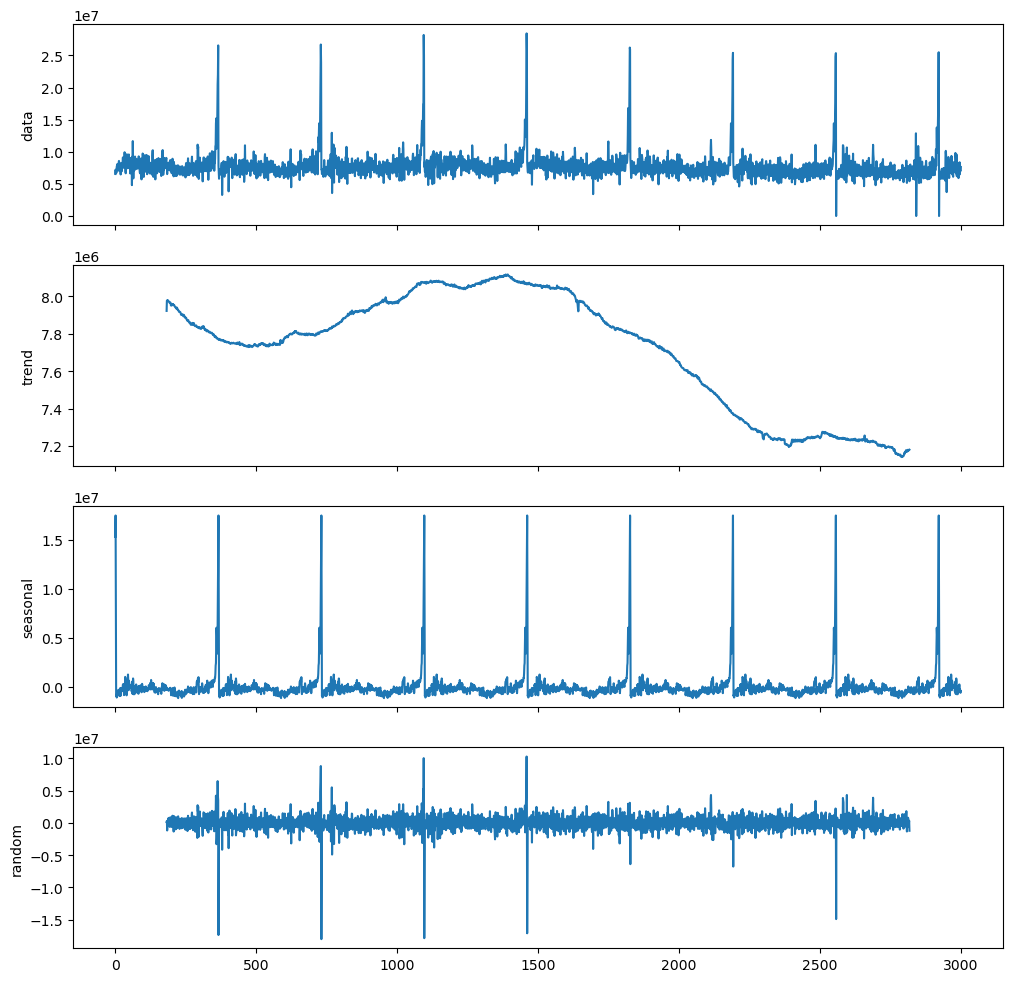

In [69]:
# 成分分解

data = df_train.sales.values

utils.decomposed_plot(arima.decompose(data,'additive',m=365),
                      figure_kwargs = {'figsize': (12, 12)} )

In [70]:
# 階差の次数を検討する

print('d =', arima.ndiffs(df_train))
print('D =',arima.nsdiffs(df_train, m=365))

d = 1
D = 0


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


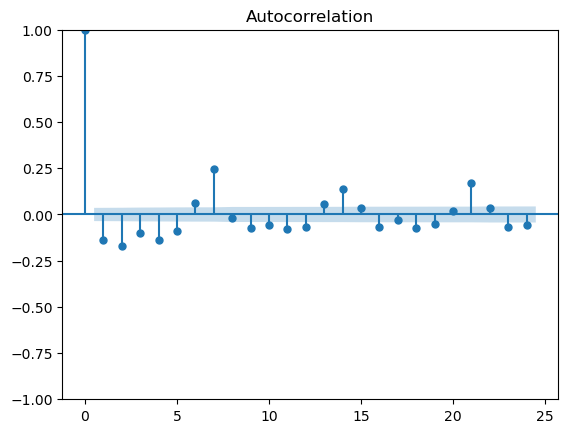

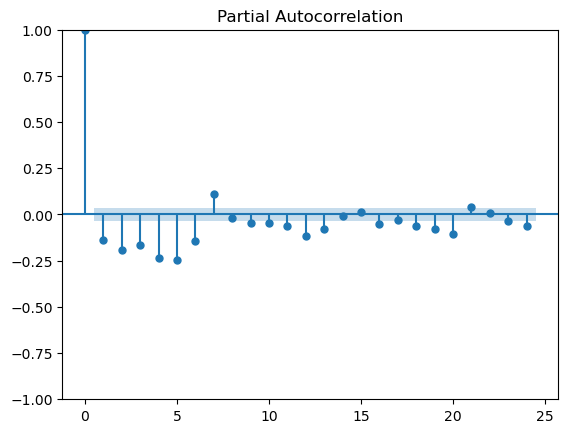

In [71]:
# 単位根検定などの定常性の統計的仮設検定を実施した結果である。
# 階差の次数は1で、季節階差の次数は0となる。

# コレログラム(自己相関と偏自己相関)

df_train_diff = df_train.diff(1).dropna()

utils.plot_acf(df_train_diff, alpha=.05, lags=24)
utils.plot_pacf(df_train_diff, alpha=.05, lags=24)

In [63]:
# SARIMAXの次数を機械的に与える。
# 一旦ARとMAの次数を1として、進める。
# SARIMAXのAR=1, d=1, MA=1, 季節AR=0, 季節階差=0, 季節MA=0

In [64]:
sarima_model = SARIMAX(df_train_diff, order=(1, 1, 1), seasonal_order=(0, 0, 0, 365))

sarima_fit = sarima_model.fit()

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58619D+01    |proj g|=  1.69922D-01

At iterate    5    f=  1.57904D+01    |proj g|=  7.16143D-03

At iterate   10    f=  1.57791D+01    |proj g|=  1.80945D-03

At iterate   15    f=  1.57779D+01    |proj g|=  8.10676D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   6.498D-06   1.578D+01
  F =   15.777855508325501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [72]:
# 予測
##学習データの期間の予測値
train_pred = sarima_fit.predict()

##テストデータの期間の予測値
test_pred = sarima_fit.forecast(len(df_test))

##予測区間
test_pred_ci = sarima_fit.get_forecast(len(df_test)).conf_int() 

# テストデータで精度検証
print('RMSE:')
print(np.sqrt(mean_squared_error(df_test, test_pred)))
print('MAE:')
print(mean_absolute_error(df_test, test_pred)) 
print('MAPE:')
print(mean_absolute_percentage_error(df_test, test_pred))

RMSE:
7615922.625724326
MAE:
7381558.330416136
MAPE:
3412679063137701.5


ValueError: x and y must have same first dimension, but have shapes (2976,) and (2975,)

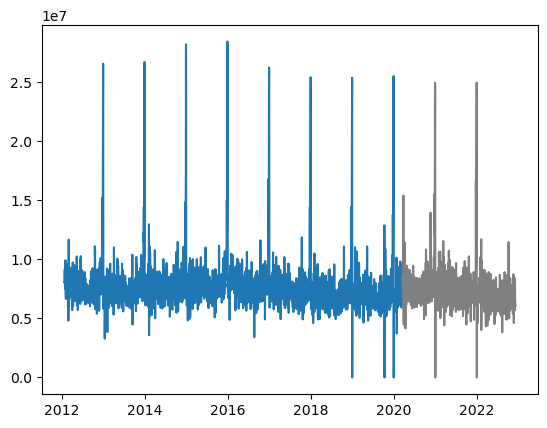

In [74]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(df_train[24:].index, df_train[24:].values, label="actual(train dataset)")
ax.plot(df_test.index, df_test.values, label="actual(test dataset)", color="gray")
ax.plot(df_train[24:].index, train_pred[24:].values, color="c")
ax.plot(df_test.index, test_pred.values, label="SARIMA", color="c") 
ax.fill_between(
    df_test.index,
    test_pred_ci.iloc[:, 0],
    test_pred_ci.iloc[:, 1],
    color='c',
    alpha=.2)
ax.legend()

In [ ]:
# SARIMAXの次数を設定せず、pmdarimaのauto_arima関数を用いて、次数を自動設定する。

arima_model = pm.auto_arima(df_train, 
                            seasonal=True,
                            m=365,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[365] intercept   : AIC=inf, Time=1672.98 sec
 ARIMA(0,1,0)(0,0,0)[365] intercept   : AIC=94537.387, Time=0.16 sec


In [ ]:
# 処理がいつまで経っても終了しなかったため、中断

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


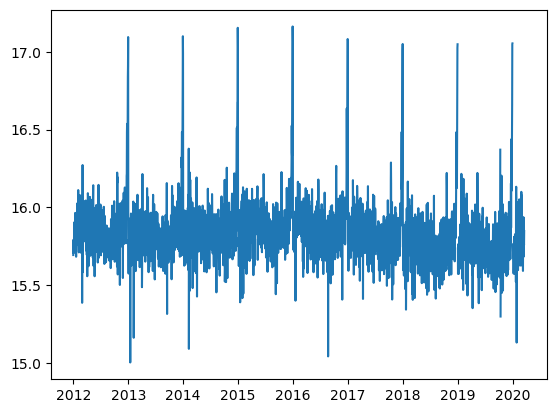

In [77]:
# 原系列を対数変換し、対数系列を作る
# 対数変換
df_log = np.log(df_train)
# 系列のプロット
plt.plot(df_log)

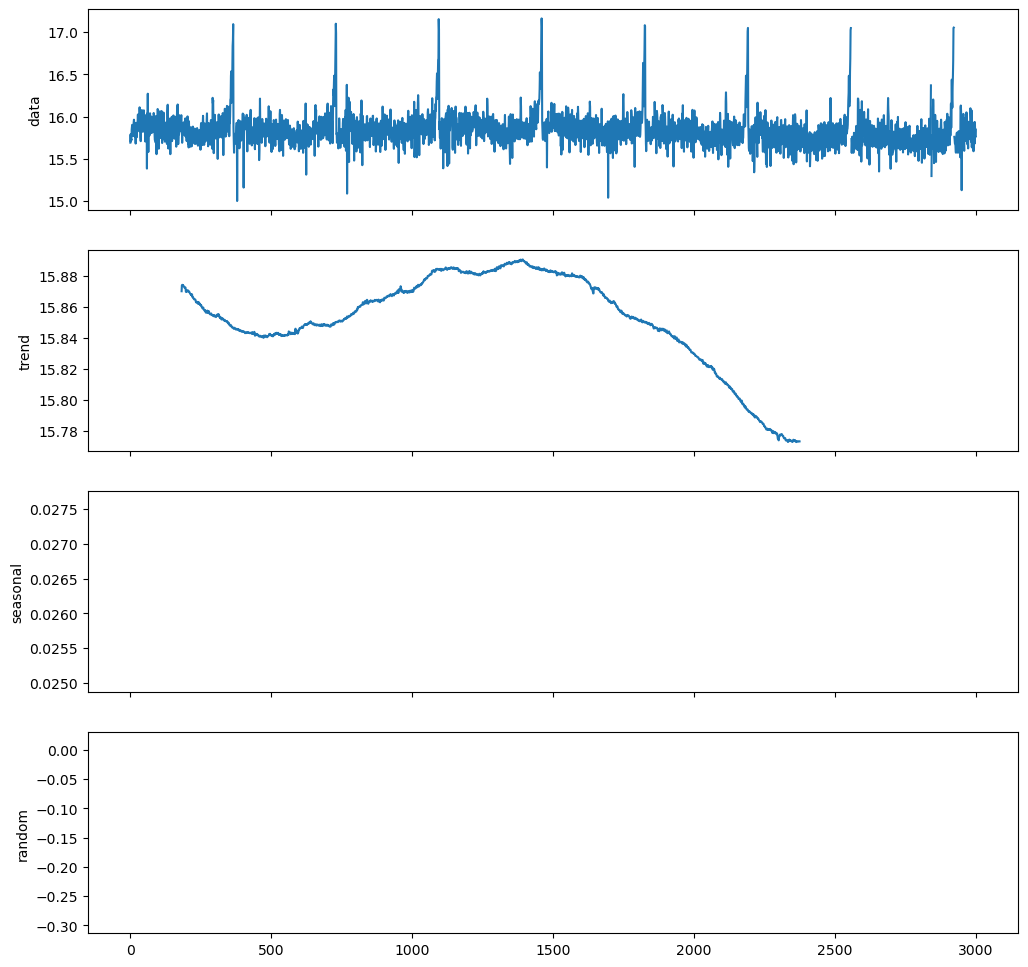

In [81]:
# 成分分解（tread・seasonal・random）
data = df_log.sales.values
utils.decomposed_plot(arima.decompose(data,'additive',m=365),
                      figure_kwargs = {'figsize': (12, 12)} )

In [82]:
# 対数取るのは微妙そう